In [1]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pytrends=TrendReq()

In [13]:
colors = ['Viva Magenta', 'Classic Blue', 'Living Coral', 'Ultra Violet', 'Greenery']
pantone_colors = {
    'Viva Magenta': '#BB2649',
    'Classic Blue': '#0F4C81',
    'Living Coral': '#FF6F61',
    'Ultra Violet': '#5F4B8B',
    'Greenery': '#88B04B'
}

C:\Users\hghol\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
C:\Users\hghol\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
C:\Users\hghol\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_op

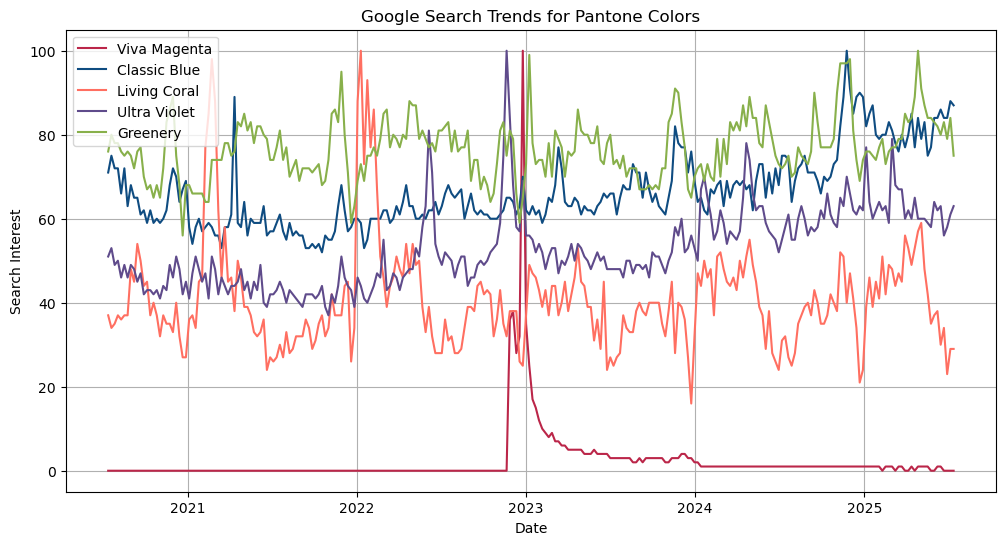

In [15]:

data = pd.DataFrame()

for color in colors:
    try:
        pytrends.build_payload([color], timeframe='today 5-y')
        trend = pytrends.interest_over_time()
        if not trend.empty:
            data[color] = trend[color]
    except Exception as e:
        print(f"Error fetching trend for {color}: {e}")

plt.figure(figsize=(12, 6))

for color_name, hex_code in pantone_colors.items():
    if color_name in data.columns:
        plt.plot(data.index, data[color_name], label=color_name, color=hex_code)

plt.title('Google Search Trends for Pantone Colors')
plt.xlabel('Date')
plt.ylabel('Search Interest')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from IPython.display import display


In [33]:
pantone_data = [
    {'Color': 'Viva Magenta', 'Year': 2023, 'HEX': '#BB2649'},
    {'Color': 'Classic Blue', 'Year': 2020, 'HEX': '#0F4C81'},
    {'Color': 'Living Coral', 'Year': 2019, 'HEX': '#FF6F61'},
    {'Color': 'Ultra Violet', 'Year': 2018, 'HEX': '#5F4B8B'},
    {'Color': 'Greenery', 'Year': 2017, 'HEX': '#88B04B'}
]

summary_df = pd.DataFrame(pantone_data)

avg_interest = []
peak_interest = []
peak_date = []

for color in summary_df['Color']:
    if color in data.columns:
        avg = data[color].mean()
        peak = data[color].max()
        date = data[color].idxmax()

    else:
        avg, peak, date = None, None, None
    avg_interest.append(avg)
    peak_interest.append(peak)
    peak_date.append(date)

summary_df['Avg Search Interest'] = avg_interest
summary_df['Peak Interest'] = peak_interest
summary_df['Date of Peak'] = peak_date

In [35]:
def highlight_row(row):
    return ['background-color: {}'.format(row['HEX'])] * len(row)

styled = summary_df.style.apply(highlight_row, axis=1).format({
    'Avg Search Interest': '{:.2f}',
    'Peak Interest': '{:.2f}'
})

styled

,Color,Year,HEX,Avg Search Interest,Peak Interest,Date of Peak
0,Viva Magenta,2023,#BB2649,2.31,100.00,2022-12-25 00:00:00
1,Classic Blue,2020,#0F4C81,66.59,100.00,2024-11-24 00:00:00
2,Living Coral,2019,#FF6F61,40.64,100.00,2022-01-09 00:00:00
3,Ultra Violet,2018,#5F4B8B,52.63,100.00,2022-11-20 00:00:00
4,Greenery,2017,#88B04B,76.63,100.00,2025-04-27 00:00:00


In [ ]:
import requests
from bs4 import BeautifulSoup

# Example collection URL
url = 'https://www.vogue.com/fashion-shows/spring-2024-ready-to-wear/ralph-lauren'

# Send request
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find image links
image_urls = []
for img in soup.find_all('img'):
    if 'data-src' in img.attrs:
        image_urls.append(img['data-src'])

print(f"Found {len(image_urls)} images:")
for link in image_urls:
    print(link)
